## ABOUT THE DATASET
1. Here we are investigating the Fama-French model for stock portfolio returns prediction. We extracted the dataset from [here](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html). Here we got the dataframe for the factor model for daily return from 1963 till 2022. The description of the columns are as follows. 
  * SMB (Small Minus Big) is the average return on the nine small stock portfolios minus the average return on the nine big stock portfolios
  * HML (High Minus Low) is the average return on the two value portfolios minus the average return on the two growth portfolios,
  * RMW (Robust Minus Weak) is the average return on the two robust operating profitability portfolios minus the average return on the two weak operating profitability portfolios,
  * CMA (Conservative Minus Aggressive) is the average return on the two conservative investment portfolios minus the average return on the two aggressive investment portfolios,
  * Mkt (Market Return): Return for a broad market index like S&P500
  * Rf is the risk-free rate like treasury bill rate.



## AIM OF THE PROJECT
* We all know about WARREN BUFFET and his stress on investing in value stocks instead of growth stocks. Value stocks that have a high book to market ratio, like the utilities companies. Growth stocks are Google and Facebook of the world. They have lower book to market ratio, they have huge growth potential.
* So we have the response column as Berkshire Hathaway portfolio returns from 1990 to 2018. So we will be analyzing the fact whether Warren Buffet has more exposure to Value investing or not. **To showcase that, we need to have more weight for the regression coefficients for the HML column.**. This will reinforce that Warren Buffet had more exposure to value companies, rather than growth or small companies. This is called as **Style analysis** in the literature.

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn-dark-palette')
%matplotlib inline

C:\Users\astar\AppData\Local\Temp\ipykernel_4660\729463605.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [2]:
#Reading the dataset
brka_rets = pd.read_csv('brka_d_ret.csv',parse_dates=True, index_col=0)
fff_data = pd.read_csv('F-F_Research_Data_5_Factors_2x3_daily.CSV')

In [3]:
#Calculating the compounding for returns
def compound(r):
    """
    returns the result of compounding the set of returns in r
    """
    return np.expm1(np.log1p(r).sum())
    
brka_m = brka_rets.resample('D').apply(compound).to_period('D')

In [4]:
brka_m['DATE'] = brka_m.index
brka_m['DATE'] = brka_m['DATE'].apply(lambda x:pd.to_datetime(str(x),format='%Y-%m-%d')) 
brka_m.set_index('DATE',inplace=True)

In [5]:
fff_data['DATE'] = fff_data['DATE'].apply(lambda x:pd.to_datetime(str(x),format='%Y-%m-%d')) 

In [6]:
fff_data.set_index('DATE',inplace=True)
# fff_data = fff_data.to_period('M')
fff_data = fff_data/100

#### WE HAVE ABSOLUTE RETURNS FOR EACH PORTFOLIO, BUT WE NEED THE EXCESS RETURN, HENCE WE WILL BE SUBTRACTING THE RISK-FREE RATE

In [7]:
for col in fff_data.columns[1:5]:
    fff_data[col] = fff_data[col]-fff_data['RF']

In [8]:
df = pd.merge(left=brka_m,right=fff_data,left_index=True,how='left',right_index=True)

In [9]:
df['BRKA-RF'] = df['BRKA']-df['RF']
df.head()

,BRKA,Mkt-RF,SMB,HML,RMW,CMA,RF,BRKA-RF
DATE,,,,,,,,
1990-01-02,-0.005764,0.0144,-0.00696,-0.00096,0.00164,-0.00466,0.00026,-0.006024
1990-01-03,0.000000,-0.0006,0.00694,-0.00286,0.00114,-0.00456,0.00026,-0.000260
1990-01-04,0.005797,-0.0071,0.00414,-0.00246,-0.00086,-0.00056,0.00026,0.005537
1990-01-05,-0.005764,-0.0085,0.00714,-0.00236,-0.00036,-0.00146,0.00026,-0.006024
1990-01-06,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.dropna(inplace=True)

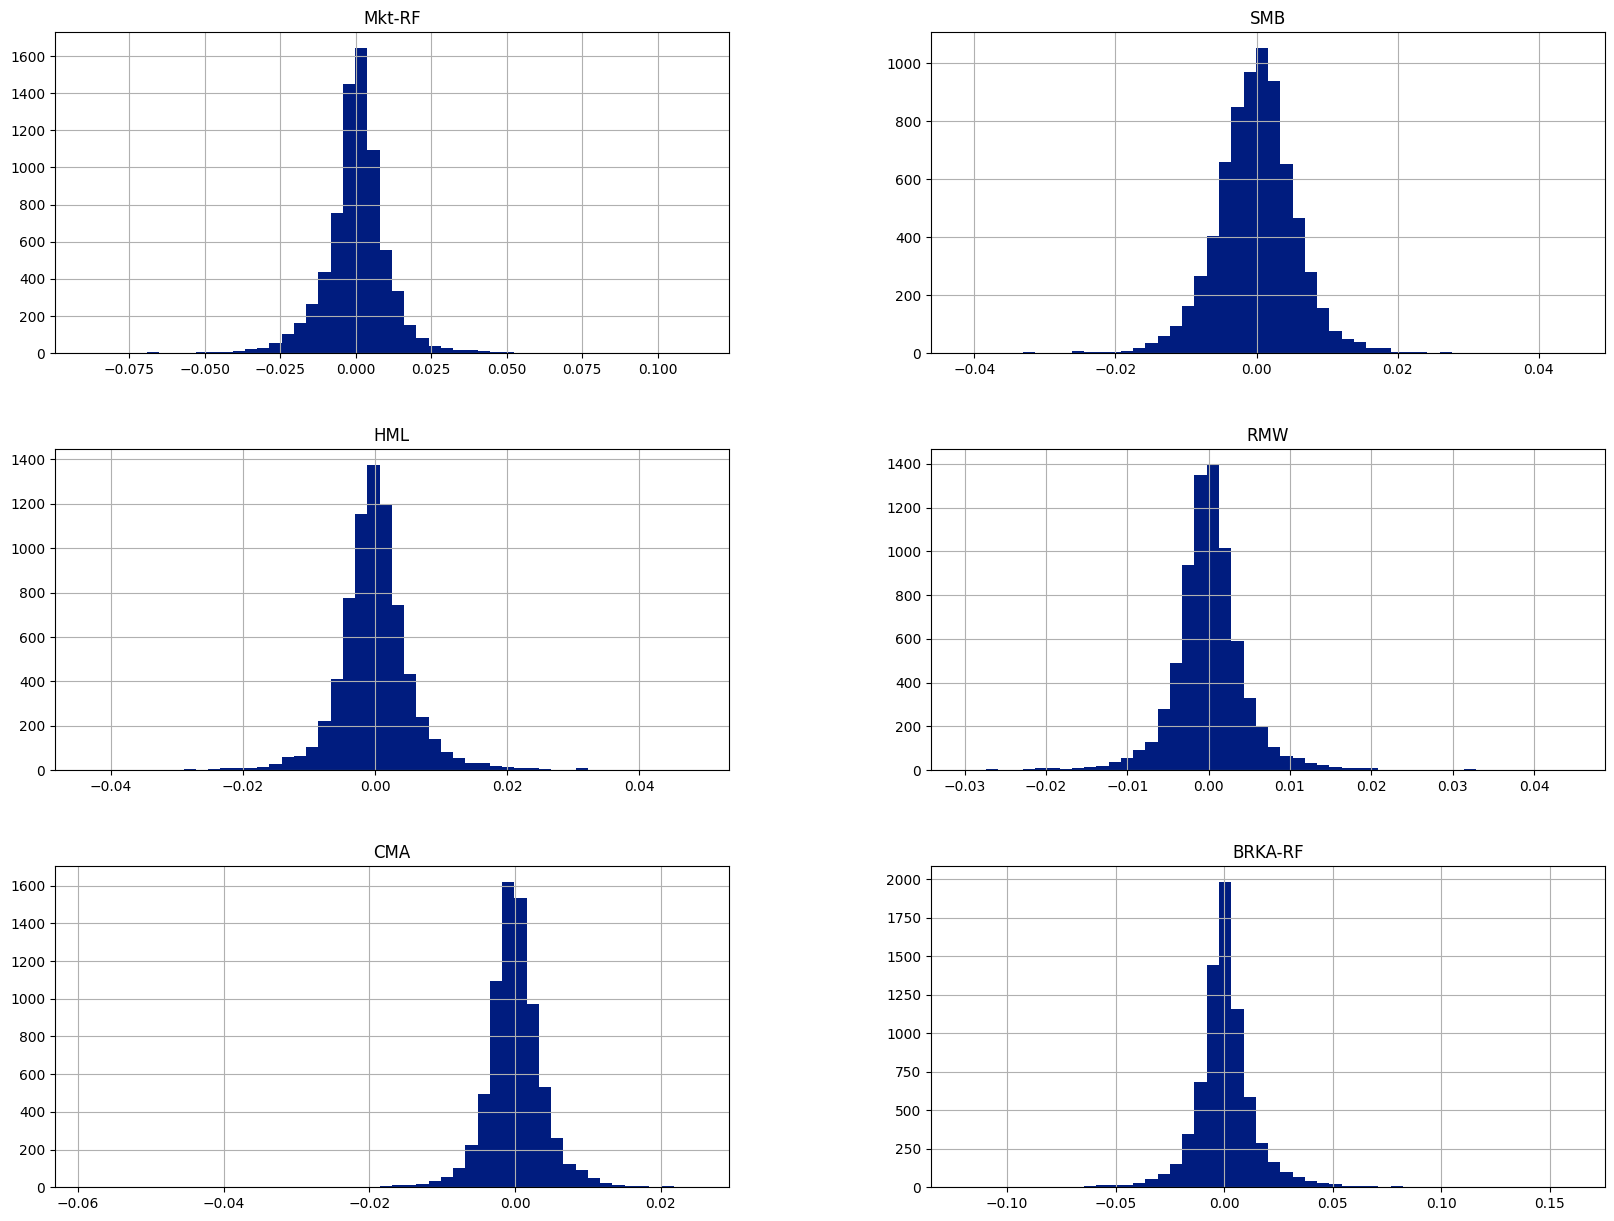

<Figure size 640x480 with 0 Axes>

In [11]:
df.drop(['RF','BRKA'],axis=1).hist(bins=50,figsize=(20,15))
plt.show()
plt.savefig("Normal.png")

In [12]:
df.drop(['RF','BRKA'],axis=1).corr(method="pearson").style.background_gradient(cmap='coolwarm').format(precision=3)


,Mkt-RF,SMB,HML,RMW,CMA,BRKA-RF
Mkt-RF,1.000,-0.002,-0.057,-0.362,-0.343,0.483
SMB,-0.002,1.000,0.051,-0.293,0.045,-0.015
HML,-0.057,0.051,1.000,0.041,0.502,0.125
RMW,-0.362,-0.293,0.041,1.000,0.219,-0.223
CMA,-0.343,0.045,0.502,0.219,1.000,-0.104
BRKA-RF,0.483,-0.015,0.125,-0.223,-0.104,1.000


#### We can see that the response column BRKA-RF is correlated with Market return (Mkt-RF) and HML. This is understandable, as the stock returns are sensitive to the changes in the market because of systematic risk from the market and also the value investing portfolio risks. This is consistent with what we are trying to showcase.

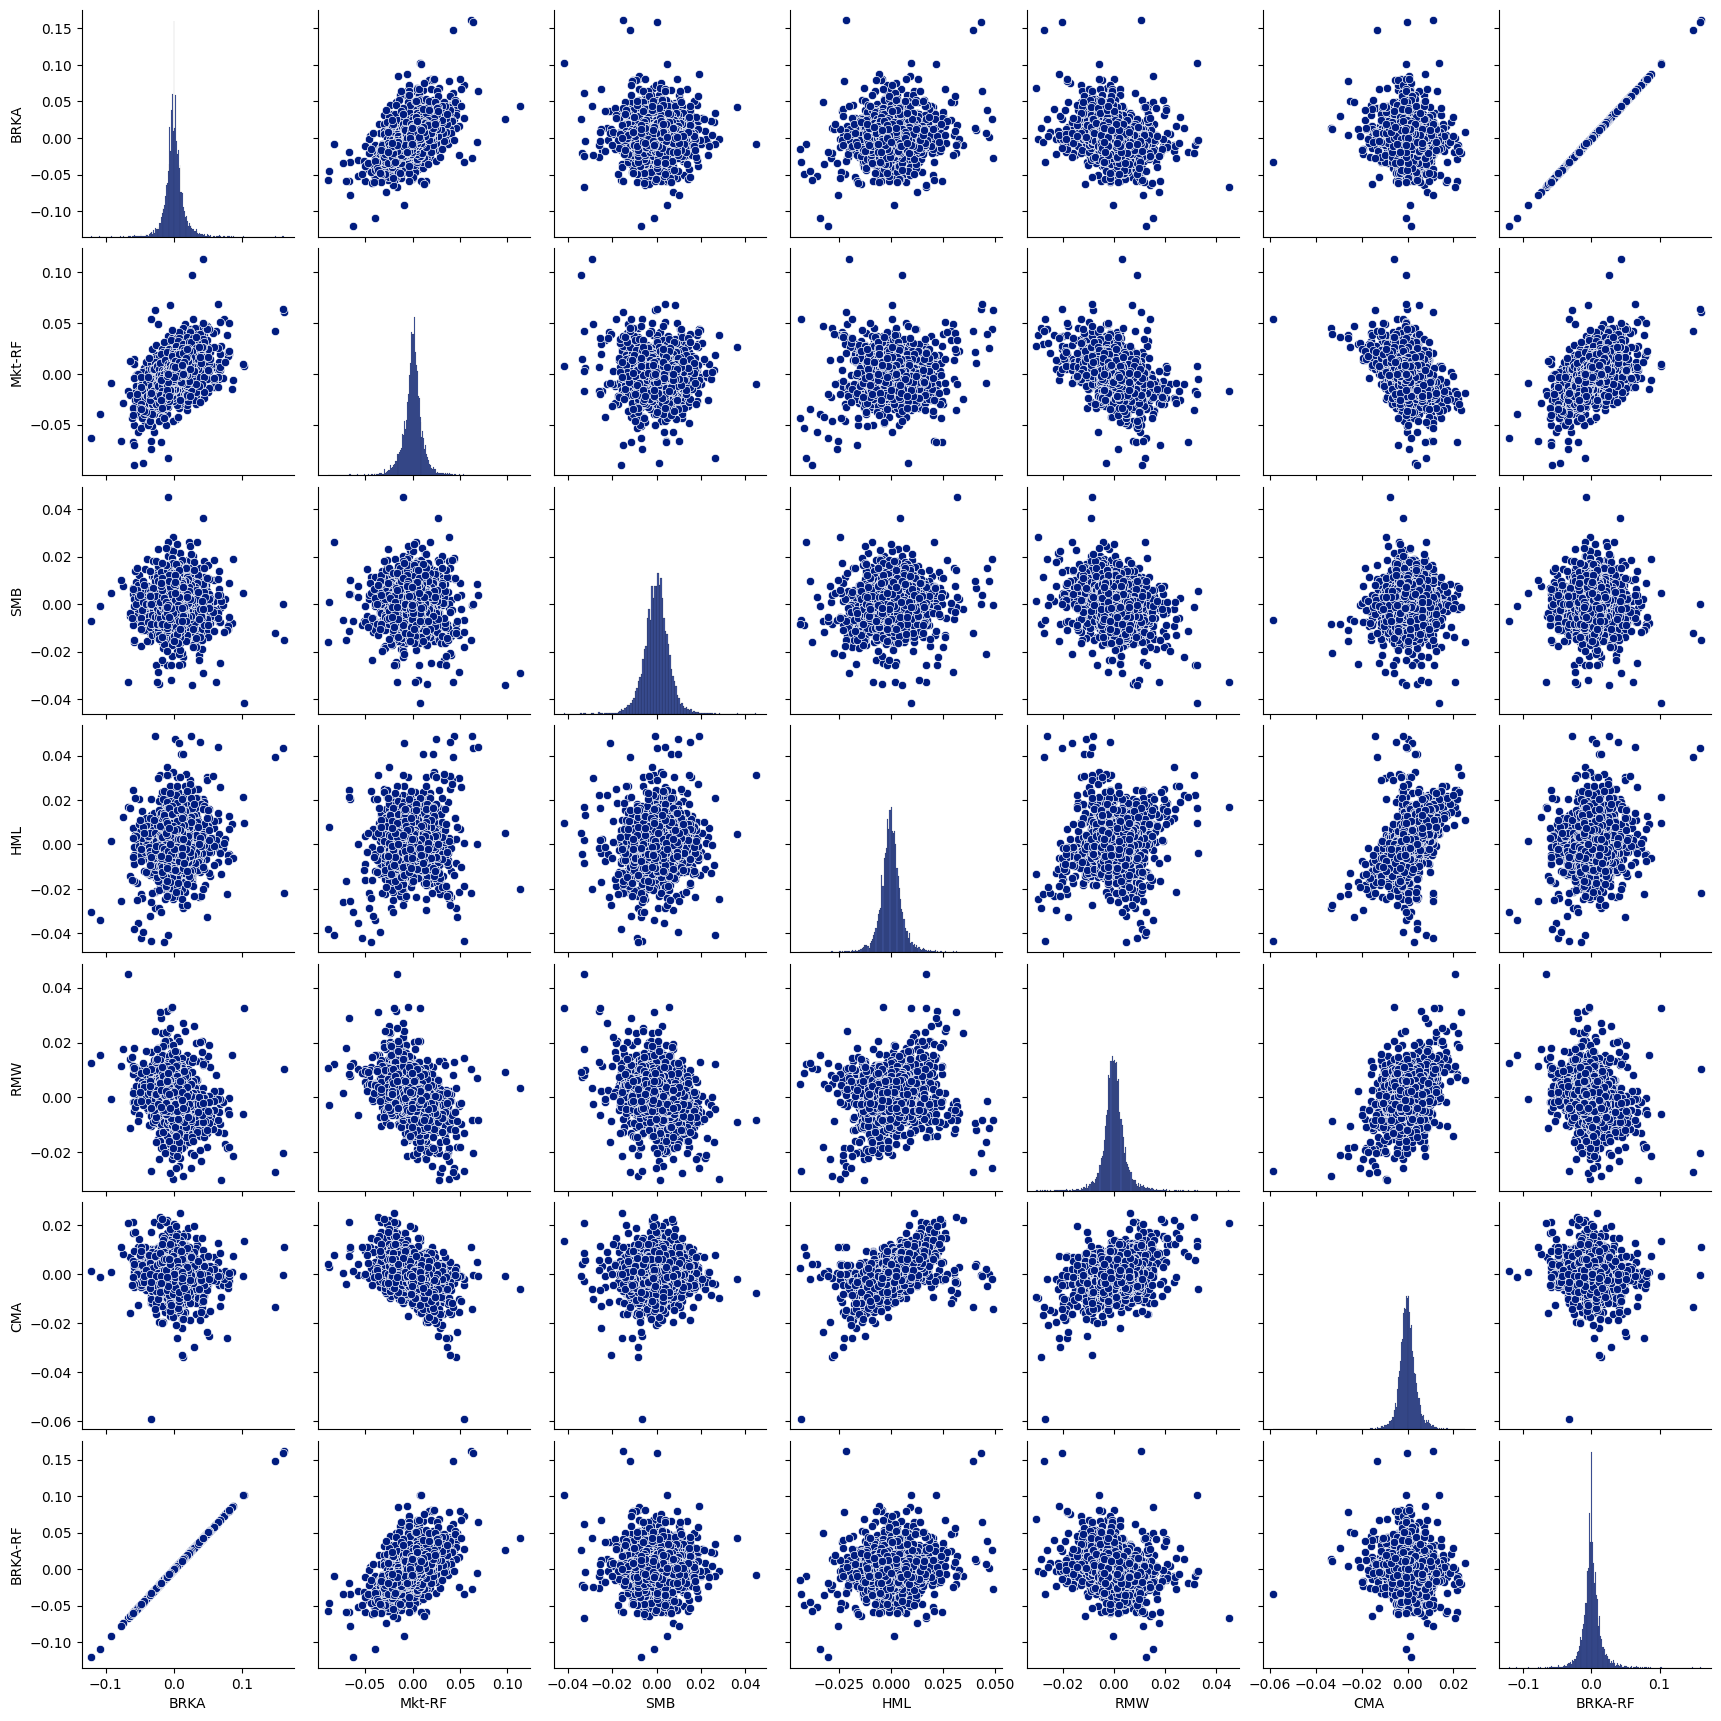

In [13]:
sns.pairplot(df.drop(['RF'],axis=1))
plt.show()

In [14]:
df.head()

,BRKA,Mkt-RF,SMB,HML,RMW,CMA,RF,BRKA-RF
DATE,,,,,,,,
1990-01-02,-0.005764,0.0144,-0.00696,-0.00096,0.00164,-0.00466,0.00026,-0.006024
1990-01-03,0.000000,-0.0006,0.00694,-0.00286,0.00114,-0.00456,0.00026,-0.000260
1990-01-04,0.005797,-0.0071,0.00414,-0.00246,-0.00086,-0.00056,0.00026,0.005537
1990-01-05,-0.005764,-0.0085,0.00714,-0.00236,-0.00036,-0.00146,0.00026,-0.006024
1990-01-08,0.000000,0.0030,-0.00426,-0.00286,0.00034,0.00284,0.00026,-0.000260


Text(0.5, 1.0, 'Berkshiere Premium')

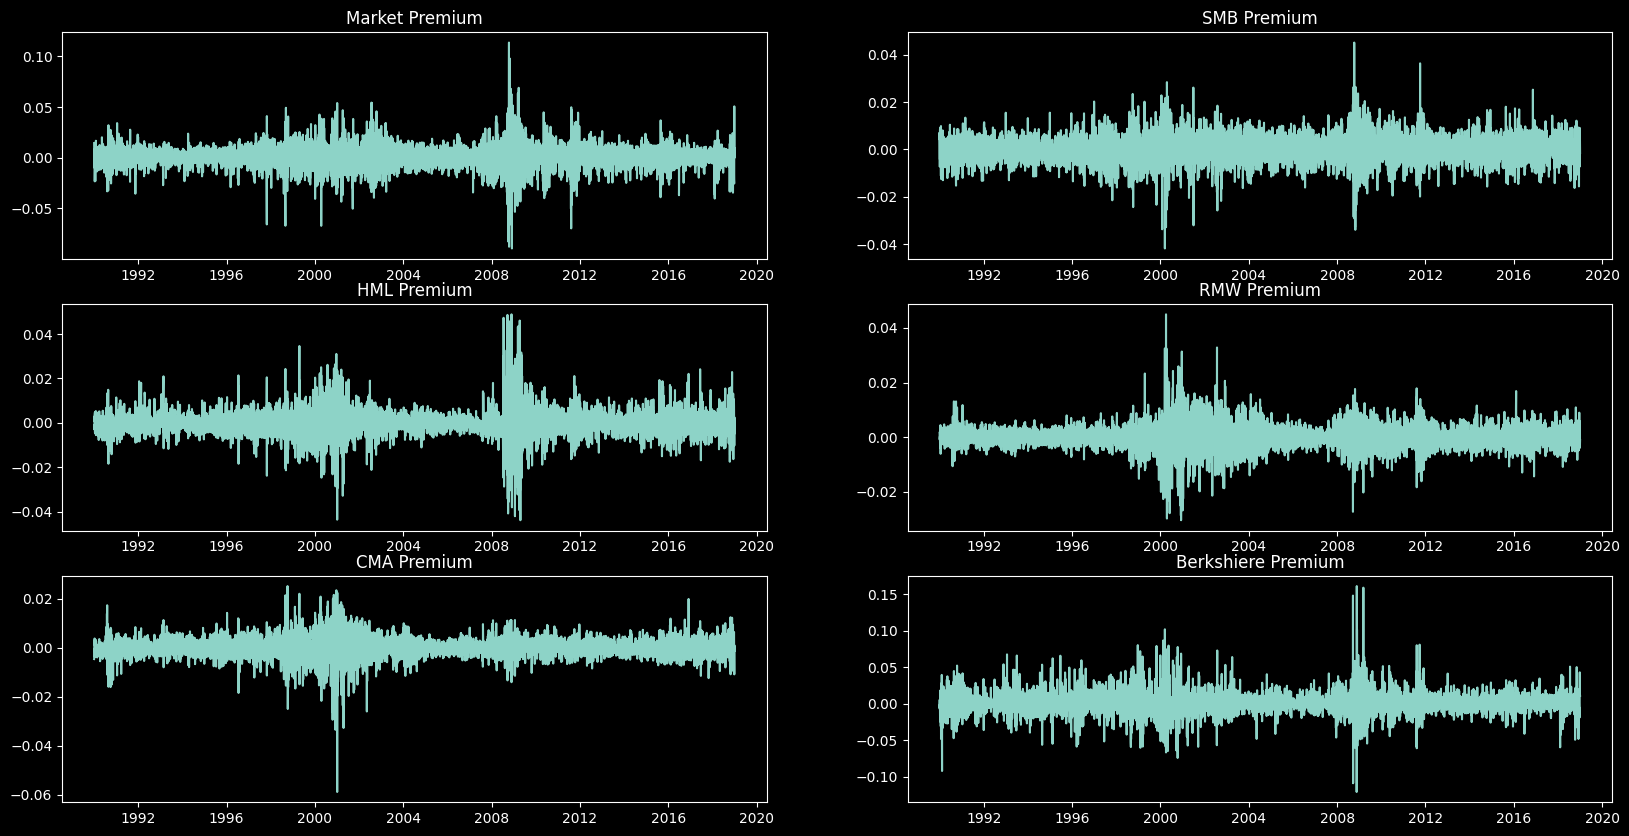

In [15]:
plt.style.use('dark_background')
fig,axis = plt.subplots(3,2,figsize=(20,10))

axis[0][0].plot(df['Mkt-RF'])
axis[0][0].set_title("Market Premium")
axis[0][1].plot(df['SMB'])
axis[0][1].set_title("SMB Premium")
axis[1][0].plot(df['HML'])
axis[1][0].set_title("HML Premium")
axis[1][1].plot(df['RMW'])
axis[1][1].set_title("RMW Premium")
axis[2][0].plot(df['CMA'])
axis[2][0].set_title("CMA Premium")
axis[2][1].plot(df['BRKA-RF'])
axis[2][1].set_title("Berkshiere Premium")

Text(0.5, 1.0, 'Autocorrelations Market Premium')

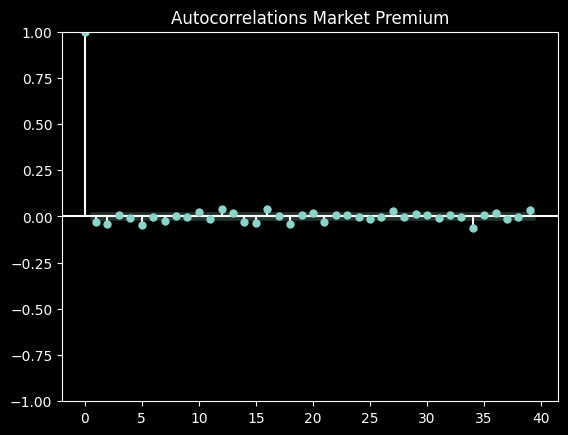

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Mkt-RF'])
plt.title("Autocorrelations Market Premium")


Text(0.5, 1.0, 'SMB Autocorrelation')

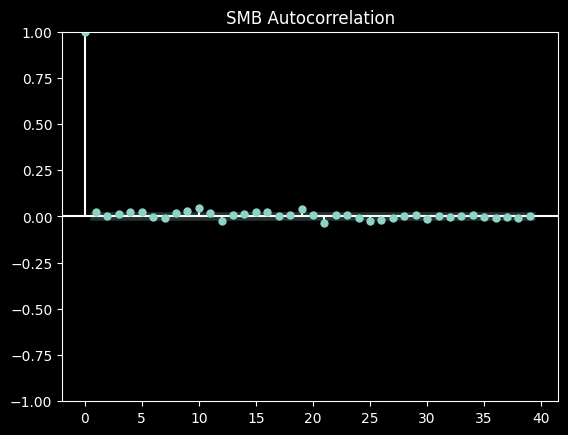

In [17]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['SMB'])
plt.title("SMB Autocorrelation")

Text(0.5, 1.0, 'HML Autocorrelation')

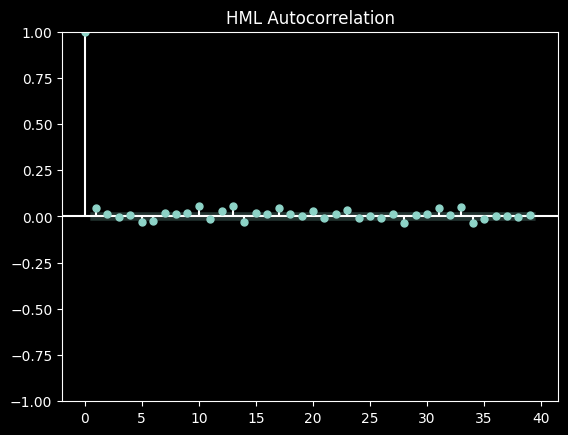

In [18]:
plot_acf(df['HML'])
plt.title("HML Autocorrelation")

Text(0.5, 1.0, 'RMW Autocorrelation')

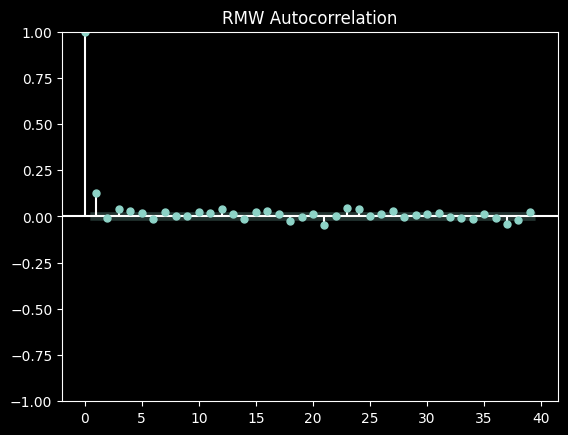

In [19]:
plot_acf(df['RMW'])
plt.title("RMW Autocorrelation")

Text(0.5, 1.0, 'RMW Autocorrelation')

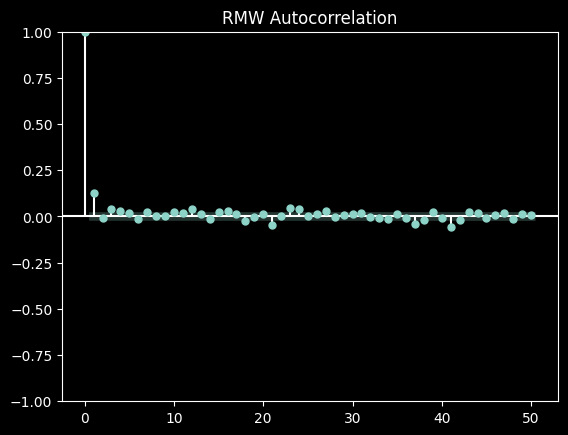

In [20]:
plot_acf(df['RMW'],lags=50)
plt.title("RMW Autocorrelation")

Text(0.5, 1.0, 'CMA Autocorrelation')

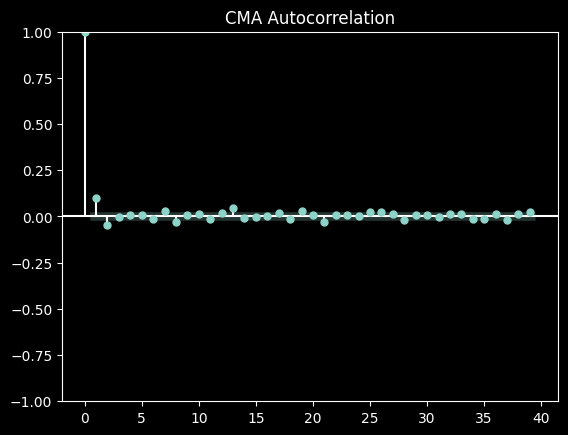

In [21]:
plot_acf(df['CMA'])
plt.title("CMA Autocorrelation")

Text(0.5, 1.0, 'Berkshiere Autocorrelation')

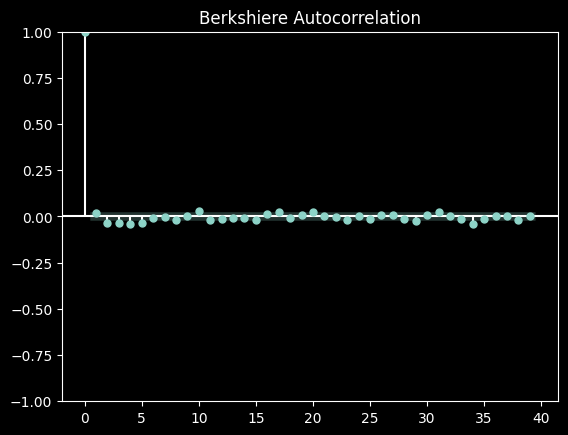

In [22]:
plot_acf(df['BRKA-RF'])
plt.title("Berkshiere Autocorrelation")

Text(0.5, 1.0, 'Risk free rate Autocorrelation')

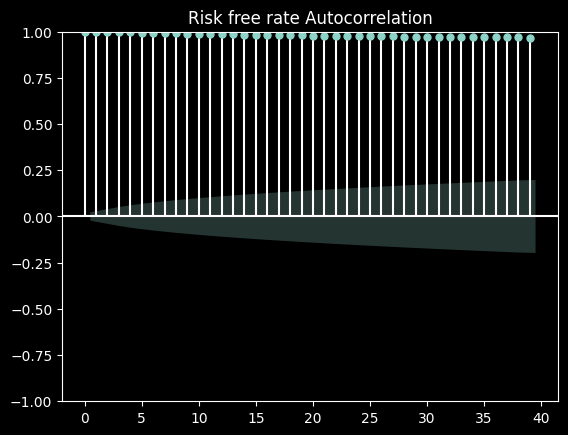

In [23]:
plot_acf(df['RF'])
plt.title("Risk free rate Autocorrelation")

Text(0.5, 0.98, 'Cross-correlations')

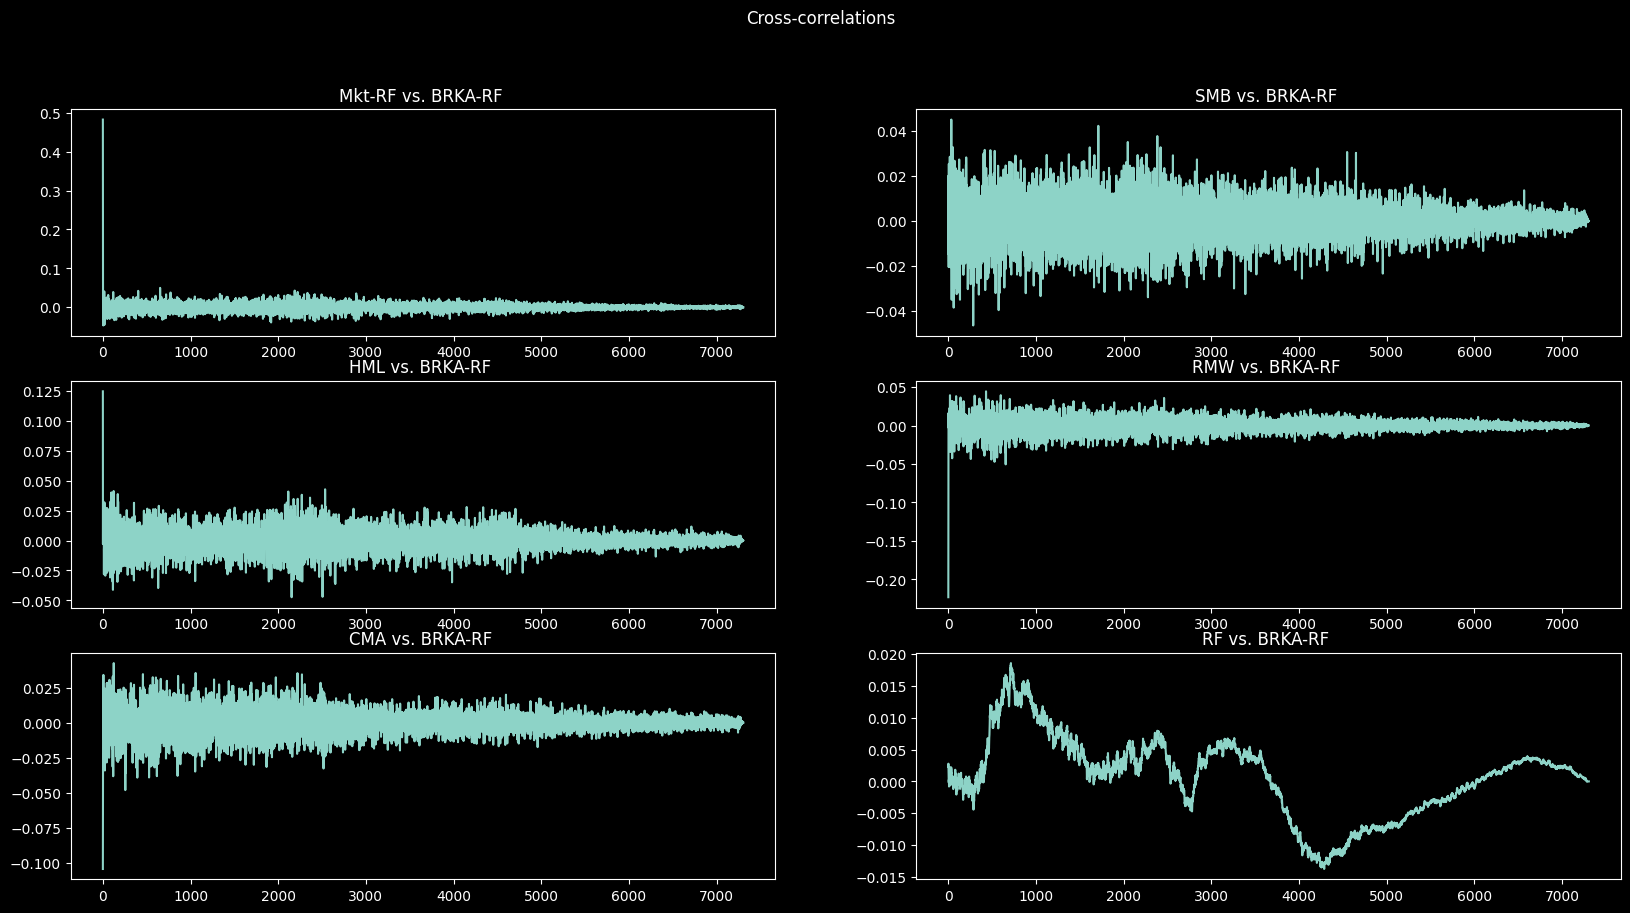

In [25]:
import itertools
import statsmodels.api as sm
plt.style.use('dark_background')
cols = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']
cols2 = ['BRKA-RF']
combinations = list(itertools.product(cols, cols2))
nrows = 3
ncols = 2

fig,axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,10))

axs = axs.ravel()

for idx,col in enumerate(combinations):
    crosscorr = sm.tsa.stattools.ccf(df[col[0]], df[col[1]], adjusted=False)
    axs[idx].plot(crosscorr)
    axs[idx].set_title(f'{col[0]} vs. {col[1]} ')
fig.suptitle("Cross-correlations")

In [26]:
df.columns

Index(['BRKA', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'BRKA-RF'], dtype='object')

Text(0.5, 0.98, 'Spectral Analysis')

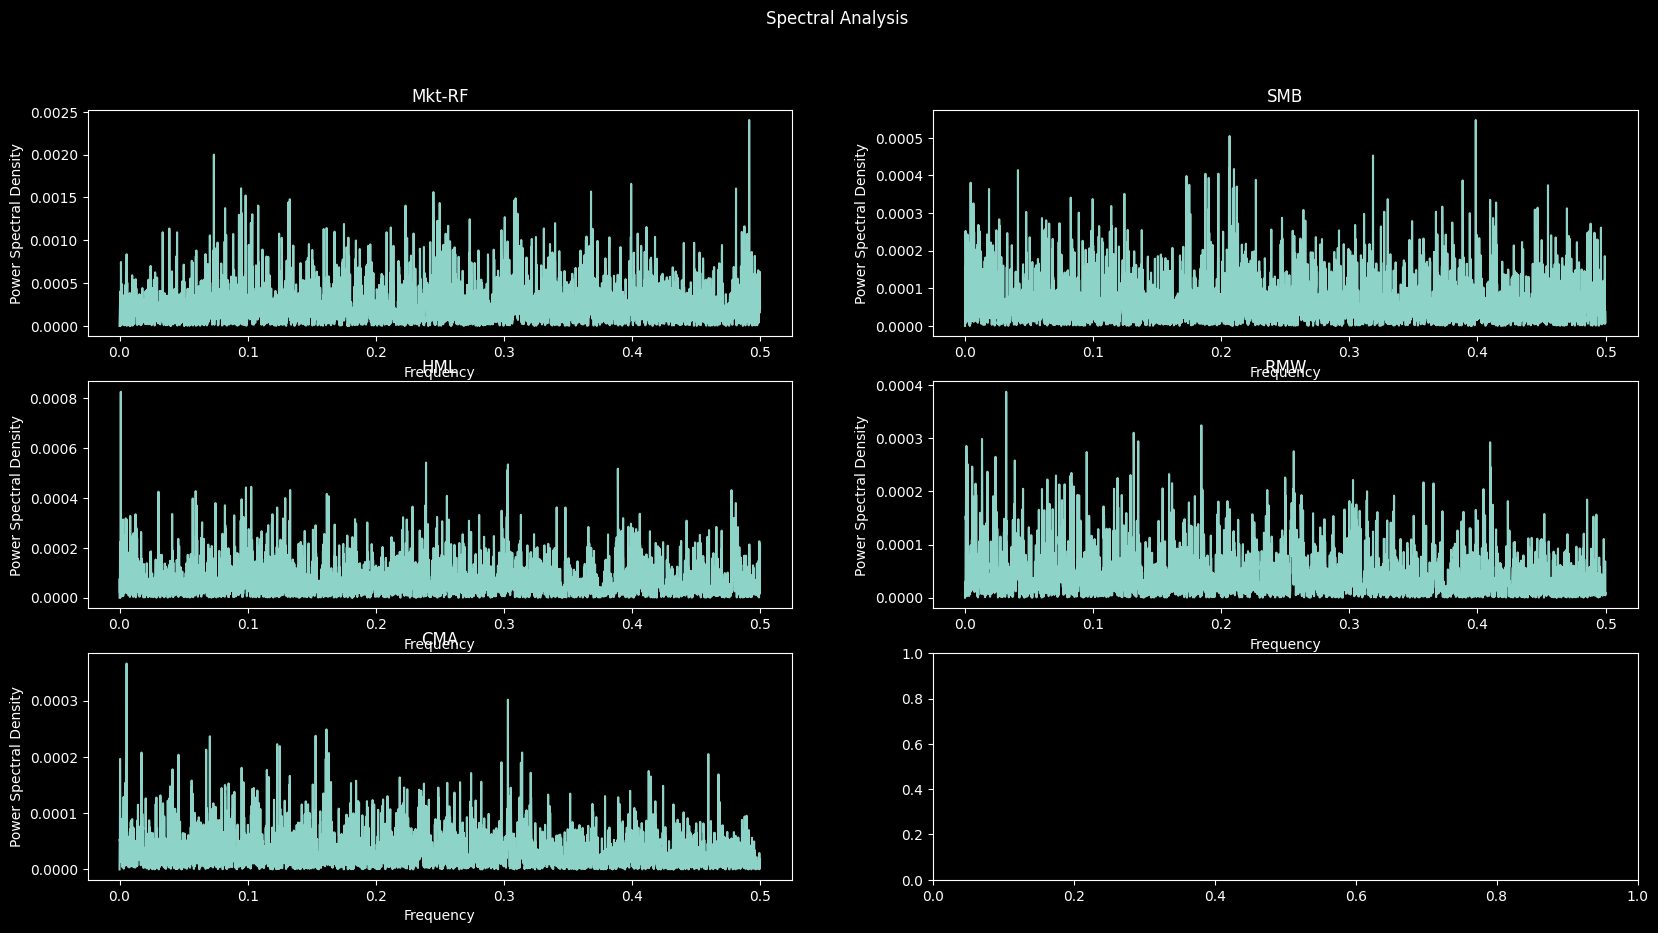

In [28]:
from scipy.signal import periodogram
col = cols+cols2

nrows = 3
ncols = 2

fig,axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,10))

axs = axs.ravel()

for idx,c in enumerate(col):
    if c == 'RF':continue
    if idx==len(col)-1:break
    freqs, psd = periodogram(df[c])
    axs[idx].plot(freqs,psd)
    axs[idx].set_title(f"{c}")
    axs[idx].set_xlabel("Frequency")
    axs[idx].set_ylabel("Power Spectral Density")
fig.suptitle("Spectral Analysis")

In [27]:
df.columns

Index(['BRKA', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'BRKA-RF'], dtype='object')

In [28]:
temp_df = df.loc["2000":]
temp_df.head()

,BRKA,Mkt-RF,SMB,HML,RMW,CMA,RF,BRKA-RF
DATE,,,,,,,,
2000-01-03,-0.023173,-0.0071,-0.00081,-0.01441,-0.01521,-0.00651,0.00021,-0.023383
2000-01-04,-0.051095,-0.0406,0.00309,0.02039,0.00449,0.01429,0.00021,-0.051305
2000-01-05,0.023077,-0.0009,0.00309,0.00139,0.00389,0.01089,0.00021,0.022867
2000-01-06,0.033835,-0.0073,-0.00061,0.01239,0.00629,0.01189,0.00021,0.033625
2000-01-07,0.027273,0.0321,-0.00951,-0.01441,-0.00901,-0.00981,0.00021,0.027063


In [29]:
df.reindex()

,BRKA,Mkt-RF,SMB,HML,RMW,CMA,RF,BRKA-RF
DATE,,,,,,,,
1990-01-02,-0.005764,0.0144,-0.00696,-0.00096,0.00164,-0.00466,0.00026,-0.006024
1990-01-03,0.000000,-0.0006,0.00694,-0.00286,0.00114,-0.00456,0.00026,-0.000260
1990-01-04,0.005797,-0.0071,0.00414,-0.00246,-0.00086,-0.00056,0.00026,0.005537
1990-01-05,-0.005764,-0.0085,0.00714,-0.00236,-0.00036,-0.00146,0.00026,-0.006024
1990-01-08,0.000000,0.0030,-0.00426,-0.00286,0.00034,0.00284,0.00026,-0.000260
...,...,...,...,...,...,...,...,...
2018-12-24,-0.018611,-0.0255,0.00909,-0.00501,-0.00351,-0.00351,0.00011,-0.018721
2018-12-26,0.043200,0.0506,-0.00201,-0.01021,-0.00221,-0.01091,0.00011,0.043090
2018-12-27,0.012379,0.0078,-0.00721,-0.00141,-0.00151,0.00099,0.00011,0.012269


In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.tsa.statespace.sarimax import 

Y_train = df.loc["2008":"2017"]['BRKA-RF']
X_train = df.loc["2008":"2017"][['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]


In [31]:
Y_test = df.loc["2018":]['BRKA-RF']
X_test = df.loc["2018":][['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]

In [104]:
import wandb

wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: athe_kunal (rf_project). Use `wandb login --relogin` to force relogin


True

In [32]:
import time

In [33]:
# order_ar = [0,1,2]
order_ar = [3,4,5]

order_diff = [0,1,2]
# order_diff = [3,4,5]
# order_mr = [0,1,2]
order_mr = [3,4,5]

# seasonal_ar = [0,1,2]
# seasonal_diff = [0,1,2]
# seasonal_mr = [0,1,2]
seasonal_m = [0,63,252]

sweep_config = {
    "method":"grid",
    "parameters":{
    "ar":{"values":order_ar},
    "diff":{"values":order_diff},
    "mr":{"values":order_mr},

    # "s_ar":{"values":seasonal_ar},
    # "s_diff":{"values":seasonal_diff},
    # "s_mr":{"values":seasonal_mr},
    "s_m":{"values":seasonal_m},
    }
}

def main():
    run = wandb.init("Time-Series-Project")

    start = time.time()
    model = SARIMAX(
        Y_train.values,
        X_train.values,
        order=(wandb.config.ar,wandb.config.diff,wandb.config.mr),
        seasonal_order=(
        # wandb.config.s_ar,wandb.config.s_diff,wandb.config.s_mr,
        0,0,0,
        wandb.config.s_m
        )
    )
    end = time.time()

    results = model.fit()
    coefs = results.params
    print(coefs)
    wandb.log({
        "AIC":results.aic,
        "BIC":results.bic,
        "Coefficients": coefs,
        "time":round(end-start,2)
    })

In [34]:
hyper_vals = {k:v["values"] for k,v in sweep_config["parameters"].items()}
hyper_vals

{'ar': [3, 4, 5], 'diff': [0, 1, 2], 'mr': [3, 4, 5], 's_m': [0, 63, 252]}

In [35]:
import itertools
a = hyper_vals.values()
combinations = list(itertools.product(*a))
len(combinations)

81

In [36]:
str(combinations[0][:3]) + str(combinations[0][3:])

'(3, 0, 3)(0,)'

In [37]:
# from tqdm import tqdm
# all_results = {}

# for comb in tqdm(combinations):
#     model = SARIMAX(Y_train,X_train,comb[:3],comb[3:])
#     results = model.fit()
#     all_results.update({str(comb[:3])+'|'+str(comb[3:]):[results.aic,results.bic,results.params]})

In [38]:
# all_results

In [112]:
# import pickle
# def save_dictionary(name:str,dicts_):
#     import pickle 

#     with open(f'{name}.pkl', 'wb') as f:
#         pickle.dump(dicts_, f)
# def read_dictionary(name:str):        
#     with open(f'{name}.pkl', 'rb') as f:
#         dicts_ = pickle.load(f)
#     return dicts_
# save_dictionary("all_results",all_results)

In [113]:
sweep_id = wandb.sweep(sweep=sweep_config, project="Time-Series-Project")
wandb.agent(sweep_id, function=main)

Create sweep with ID: rwkshh8e
Sweep URL: https://wandb.ai/rf_project/Time-Series-Project/sweeps/rwkshh8e


wandb: Agent Starting Run: 3d7vqaof with config:
wandb: 	ar: 3
wandb: 	diff: 0
wandb: 	mr: 3
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.27125604e-01 -1.93328516e-01  2.06139578e-01 -7.31493943e-01
  1.42049082e-01  1.58023051e-01 -3.36874061e-01  3.70129316e-01
 -2.89833171e-01  4.13717835e-01 -4.28266204e-01  1.04066166e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15922.1158
BIC,-15852.14116
time,0.0


wandb: Agent Starting Run: 1xhm1hup with config:
wandb: 	ar: 3
wandb: 	diff: 0
wandb: 	mr: 3
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.27125604e-01 -1.93328516e-01  2.06139578e-01 -7.31493943e-01
  1.42049082e-01  1.58023051e-01 -3.36874061e-01  3.70129316e-01
 -2.89833171e-01  4.13717835e-01 -4.28266204e-01  1.04066166e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15922.1158
BIC,-15852.14116
time,0.0


wandb: Agent Starting Run: vw8d0kuz with config:
wandb: 	ar: 3
wandb: 	diff: 0
wandb: 	mr: 3
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.27125604e-01 -1.93328516e-01  2.06139578e-01 -7.31493943e-01
  1.42049082e-01  1.58023051e-01 -3.36874061e-01  3.70129316e-01
 -2.89833171e-01  4.13717835e-01 -4.28266204e-01  1.04066166e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15922.1158
BIC,-15852.14116
time,0.0


wandb: Agent Starting Run: u9iouxbw with config:
wandb: 	ar: 3
wandb: 	diff: 0
wandb: 	mr: 4
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.34279921e-01 -1.88263597e-01  1.44751910e-01 -8.28325905e-01
  2.26611520e-01 -1.54885036e-01 -2.05262382e-01  2.45901108e-02
  5.15768454e-02  2.40173868e-01 -4.24275354e-02 -1.04641950e-01
  1.03573933e-04]


AIC,▁
BIC,▁
time,▁
AIC,-15930.522
BIC,-15854.71614
time,0.0


wandb: Agent Starting Run: eatxtxxo with config:
wandb: 	ar: 3
wandb: 	diff: 0
wandb: 	mr: 4
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.34279921e-01 -1.88263597e-01  1.44751910e-01 -8.28325905e-01
  2.26611520e-01 -1.54885036e-01 -2.05262382e-01  2.45901108e-02
  5.15768454e-02  2.40173868e-01 -4.24275354e-02 -1.04641950e-01
  1.03573933e-04]


AIC,▁
BIC,▁
time,▁
AIC,-15930.522
BIC,-15854.71614
time,0.0


wandb: Agent Starting Run: d2alngre with config:
wandb: 	ar: 3
wandb: 	diff: 0
wandb: 	mr: 4
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.34279921e-01 -1.88263597e-01  1.44751910e-01 -8.28325905e-01
  2.26611520e-01 -1.54885036e-01 -2.05262382e-01  2.45901108e-02
  5.15768454e-02  2.40173868e-01 -4.24275354e-02 -1.04641950e-01
  1.03573933e-04]


AIC,▁
BIC,▁
time,▁
AIC,-15930.522
BIC,-15854.71614
time,0.0


wandb: Agent Starting Run: s6i606s4 with config:
wandb: 	ar: 3
wandb: 	diff: 0
wandb: 	mr: 5
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


[ 6.35592168e-01 -1.97614261e-01  1.53024061e-01 -8.01917326e-01
  2.20004228e-01 -5.09237950e-02  1.96442233e-02  1.46815817e-03
 -5.65738509e-02  3.03636538e-02 -2.25145302e-03 -1.25318362e-01
  1.89395398e-02  1.03133686e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15927.61463
BIC,-15845.97755
time,0.0


wandb: Agent Starting Run: distda06 with config:
wandb: 	ar: 3
wandb: 	diff: 0
wandb: 	mr: 5
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.35592168e-01 -1.97614261e-01  1.53024061e-01 -8.01917326e-01
  2.20004228e-01 -5.09237950e-02  1.96442233e-02  1.46815817e-03
 -5.65738509e-02  3.03636538e-02 -2.25145302e-03 -1.25318362e-01
  1.89395398e-02  1.03133686e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15927.61463
BIC,-15845.97755
time,0.0


wandb: Agent Starting Run: 40n8nmqi with config:
wandb: 	ar: 3
wandb: 	diff: 0
wandb: 	mr: 5
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.35592168e-01 -1.97614261e-01  1.53024061e-01 -8.01917326e-01
  2.20004228e-01 -5.09237950e-02  1.96442233e-02  1.46815817e-03
 -5.65738509e-02  3.03636538e-02 -2.25145302e-03 -1.25318362e-01
  1.89395398e-02  1.03133686e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15927.61463
BIC,-15845.97755
time,0.0


wandb: Agent Starting Run: ayoxrjyn with config:
wandb: 	ar: 3
wandb: 	diff: 1
wandb: 	mr: 3
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.05864444e-01 -2.05357832e-01  2.04189873e-01 -8.71044400e-01
  3.07905418e-01 -8.68331157e-01 -6.87011462e-01 -2.57640135e-02
 -2.29826080e-01 -8.24324048e-02 -6.17172391e-01  1.11939096e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15838.30429
BIC,-15768.33441
time,0.0


wandb: Agent Starting Run: 9bitnirp with config:
wandb: 	ar: 3
wandb: 	diff: 1
wandb: 	mr: 3
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.05864444e-01 -2.05357832e-01  2.04189873e-01 -8.71044400e-01
  3.07905418e-01 -8.68331157e-01 -6.87011462e-01 -2.57640135e-02
 -2.29826080e-01 -8.24324048e-02 -6.17172391e-01  1.11939096e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15838.30429
BIC,-15768.33441
time,0.0


wandb: Agent Starting Run: dz2saezw with config:
wandb: 	ar: 3
wandb: 	diff: 1
wandb: 	mr: 3
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.05864444e-01 -2.05357832e-01  2.04189873e-01 -8.71044400e-01
  3.07905418e-01 -8.68331157e-01 -6.87011462e-01 -2.57640135e-02
 -2.29826080e-01 -8.24324048e-02 -6.17172391e-01  1.11939096e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15838.30429
BIC,-15768.33441
time,0.01


wandb: Agent Starting Run: 7g1d5vo7 with config:
wandb: 	ar: 3
wandb: 	diff: 1
wandb: 	mr: 4
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.51247488e-01 -2.01961160e-01  1.82669231e-01 -8.16128337e-01
  2.19716873e-01 -9.96071464e-01 -7.98826474e-01 -2.92987252e-01
 -6.56993014e-02 -9.40408990e-02 -4.33815190e-01 -3.70052873e-01
  1.05342107e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15876.34158
BIC,-15800.54088
time,0.0


wandb: Agent Starting Run: 629x3sem with config:
wandb: 	ar: 3
wandb: 	diff: 1
wandb: 	mr: 4
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.51247488e-01 -2.01961160e-01  1.82669231e-01 -8.16128337e-01
  2.19716873e-01 -9.96071464e-01 -7.98826474e-01 -2.92987252e-01
 -6.56993014e-02 -9.40408990e-02 -4.33815190e-01 -3.70052873e-01
  1.05342107e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15876.34158
BIC,-15800.54088
time,0.0


wandb: Agent Starting Run: yec5d63p with config:
wandb: 	ar: 3
wandb: 	diff: 1
wandb: 	mr: 4
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.51247488e-01 -2.01961160e-01  1.82669231e-01 -8.16128337e-01
  2.19716873e-01 -9.96071464e-01 -7.98826474e-01 -2.92987252e-01
 -6.56993014e-02 -9.40408990e-02 -4.33815190e-01 -3.70052873e-01
  1.05342107e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15876.34158
BIC,-15800.54088
time,0.0


wandb: Agent Starting Run: xnis4j1p with config:
wandb: 	ar: 3
wandb: 	diff: 1
wandb: 	mr: 5
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.16377800e-01 -2.02743996e-01  2.04087894e-01 -8.58481466e-01
  2.99115152e-01 -9.91639328e-01 -8.18047039e-01 -4.71944116e-01
 -8.16750969e-02 -6.82446009e-02 -2.97335043e-01 -5.44076253e-01
  5.15211943e-02  1.06229687e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15868.0278
BIC,-15786.39627
time,0.0


wandb: Agent Starting Run: jncgvg44 with config:
wandb: 	ar: 3
wandb: 	diff: 1
wandb: 	mr: 5
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.16377800e-01 -2.02743996e-01  2.04087894e-01 -8.58481466e-01
  2.99115152e-01 -9.91639328e-01 -8.18047039e-01 -4.71944116e-01
 -8.16750969e-02 -6.82446009e-02 -2.97335043e-01 -5.44076253e-01
  5.15211943e-02  1.06229687e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15868.0278
BIC,-15786.39627
time,0.0


wandb: Agent Starting Run: in3wwmch with config:
wandb: 	ar: 3
wandb: 	diff: 1
wandb: 	mr: 5
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.16377800e-01 -2.02743996e-01  2.04087894e-01 -8.58481466e-01
  2.99115152e-01 -9.91639328e-01 -8.18047039e-01 -4.71944116e-01
 -8.16750969e-02 -6.82446009e-02 -2.97335043e-01 -5.44076253e-01
  5.15211943e-02  1.06229687e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15868.0278
BIC,-15786.39627
time,0.0


wandb: Agent Starting Run: hsuse1zy with config:
wandb: 	ar: 3
wandb: 	diff: 2
wandb: 	mr: 3
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.56547878e-01 -2.23057106e-01  1.08236142e-01 -8.74753182e-01
  2.65307079e-01 -1.84606659e+00 -1.52088748e+00 -4.61785973e-01
  2.02018488e-01 -5.73401997e-01 -6.03754125e-01  1.53391586e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-14939.38306
BIC,-14869.41795
time,0.0


wandb: Agent Starting Run: 0klmll9p with config:
wandb: 	ar: 3
wandb: 	diff: 2
wandb: 	mr: 3
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.56547878e-01 -2.23057106e-01  1.08236142e-01 -8.74753182e-01
  2.65307079e-01 -1.84606659e+00 -1.52088748e+00 -4.61785973e-01
  2.02018488e-01 -5.73401997e-01 -6.03754125e-01  1.53391586e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-14939.38306
BIC,-14869.41795
time,0.0


wandb: Agent Starting Run: t832zza3 with config:
wandb: 	ar: 3
wandb: 	diff: 2
wandb: 	mr: 3
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.56547878e-01 -2.23057106e-01  1.08236142e-01 -8.74753182e-01
  2.65307079e-01 -1.84606659e+00 -1.52088748e+00 -4.61785973e-01
  2.02018488e-01 -5.73401997e-01 -6.03754125e-01  1.53391586e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-14939.38306
BIC,-14869.41795
time,0.0


wandb: Agent Starting Run: hpt3tir2 with config:
wandb: 	ar: 3
wandb: 	diff: 2
wandb: 	mr: 4
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.68148176e-01 -1.92692364e-01  1.99814067e-01 -7.04983248e-01
 -1.26858427e-01 -1.82904663e+00 -1.10457748e+00 -9.21689391e-02
 -1.07595825e-01 -1.40877919e+00 -2.56212116e-01  7.81132788e-01
  1.09567810e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15591.89965
BIC,-15516.10412
time,0.0


wandb: Agent Starting Run: eqsptaz3 with config:
wandb: 	ar: 3
wandb: 	diff: 2
wandb: 	mr: 4
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.68148176e-01 -1.92692364e-01  1.99814067e-01 -7.04983248e-01
 -1.26858427e-01 -1.82904663e+00 -1.10457748e+00 -9.21689391e-02
 -1.07595825e-01 -1.40877919e+00 -2.56212116e-01  7.81132788e-01
  1.09567810e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15591.89965
BIC,-15516.10412
time,0.0


wandb: Agent Starting Run: wq9tjlzq with config:
wandb: 	ar: 3
wandb: 	diff: 2
wandb: 	mr: 4
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.68148176e-01 -1.92692364e-01  1.99814067e-01 -7.04983248e-01
 -1.26858427e-01 -1.82904663e+00 -1.10457748e+00 -9.21689391e-02
 -1.07595825e-01 -1.40877919e+00 -2.56212116e-01  7.81132788e-01
  1.09567810e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15591.89965
BIC,-15516.10412
time,0.0


wandb: Agent Starting Run: 9m55bglc with config:
wandb: 	ar: 3
wandb: 	diff: 2
wandb: 	mr: 5
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.84983346e-01 -2.03726177e-01  1.21357018e-01 -8.68258344e-01
  3.29535742e-01 -2.25419769e+00 -2.17728124e+00 -8.91546302e-01
  3.61266991e-01 -1.09655207e+00 -1.12042026e+00  2.00387494e-01
  6.65843113e-01  1.18499218e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15552.63226
BIC,-15471.0063
time,0.0


wandb: Agent Starting Run: 3t492ctt with config:
wandb: 	ar: 3
wandb: 	diff: 2
wandb: 	mr: 5
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.84983346e-01 -2.03726177e-01  1.21357018e-01 -8.68258344e-01
  3.29535742e-01 -2.25419769e+00 -2.17728124e+00 -8.91546302e-01
  3.61266991e-01 -1.09655207e+00 -1.12042026e+00  2.00387494e-01
  6.65843113e-01  1.18499218e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15552.63226
BIC,-15471.0063
time,0.0


wandb: Agent Starting Run: nsghwna4 with config:
wandb: 	ar: 3
wandb: 	diff: 2
wandb: 	mr: 5
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.84983346e-01 -2.03726177e-01  1.21357018e-01 -8.68258344e-01
  3.29535742e-01 -2.25419769e+00 -2.17728124e+00 -8.91546302e-01
  3.61266991e-01 -1.09655207e+00 -1.12042026e+00  2.00387494e-01
  6.65843113e-01  1.18499218e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15552.63226
BIC,-15471.0063
time,0.0


wandb: Agent Starting Run: ry9jwacc with config:
wandb: 	ar: 4
wandb: 	diff: 0
wandb: 	mr: 3
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.34280015e-01 -1.88263553e-01  1.44751968e-01 -8.28325904e-01
  2.26611517e-01 -1.37909671e-01 -1.99702875e-01 -7.75159862e-02
 -1.16064206e-01  3.07698896e-02  2.37015252e-01  5.76888220e-02
  1.03642729e-04]


AIC,▁
BIC,▁
time,▁
AIC,-15929.23416
BIC,-15853.4283
time,0.0


wandb: Agent Starting Run: 2cnjpo6l with config:
wandb: 	ar: 4
wandb: 	diff: 0
wandb: 	mr: 3
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.34280015e-01 -1.88263553e-01  1.44751968e-01 -8.28325904e-01
  2.26611517e-01 -1.37909671e-01 -1.99702875e-01 -7.75159862e-02
 -1.16064206e-01  3.07698896e-02  2.37015252e-01  5.76888220e-02
  1.03642729e-04]


AIC,▁
BIC,▁
time,▁
AIC,-15929.23416
BIC,-15853.4283
time,0.0


wandb: Agent Starting Run: zu1j7xeu with config:
wandb: 	ar: 4
wandb: 	diff: 0
wandb: 	mr: 3
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.34280015e-01 -1.88263553e-01  1.44751968e-01 -8.28325904e-01
  2.26611517e-01 -1.37909671e-01 -1.99702875e-01 -7.75159862e-02
 -1.16064206e-01  3.07698896e-02  2.37015252e-01  5.76888220e-02
  1.03642729e-04]


AIC,▁
BIC,▁
time,▁
AIC,-15929.23416
BIC,-15853.4283
time,0.0


wandb: Agent Starting Run: oqpf3r3g with config:
wandb: 	ar: 4
wandb: 	diff: 0
wandb: 	mr: 4
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.34279913e-01 -1.88263600e-01  1.44751909e-01 -8.28325904e-01
  2.26611521e-01 -1.63967016e-01 -2.00548495e-01  2.67808018e-02
  1.20215037e-02  6.06468326e-02  2.34497677e-01 -4.36512657e-02
 -1.16707324e-01  1.03570070e-04]


AIC,▁
BIC,▁
time,▁
AIC,-15928.61351
BIC,-15846.97643
time,0.0


wandb: Agent Starting Run: w7mijcbp with config:
wandb: 	ar: 4
wandb: 	diff: 0
wandb: 	mr: 4
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.34279913e-01 -1.88263600e-01  1.44751909e-01 -8.28325904e-01
  2.26611521e-01 -1.63967016e-01 -2.00548495e-01  2.67808018e-02
  1.20215037e-02  6.06468326e-02  2.34497677e-01 -4.36512657e-02
 -1.16707324e-01  1.03570070e-04]


AIC,▁
BIC,▁
time,▁
AIC,-15928.61351
BIC,-15846.97643
time,0.0


wandb: Agent Starting Run: 54rqq2br with config:
wandb: 	ar: 4
wandb: 	diff: 0
wandb: 	mr: 4
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.34279913e-01 -1.88263600e-01  1.44751909e-01 -8.28325904e-01
  2.26611521e-01 -1.63967016e-01 -2.00548495e-01  2.67808018e-02
  1.20215037e-02  6.06468326e-02  2.34497677e-01 -4.36512657e-02
 -1.16707324e-01  1.03570070e-04]


AIC,▁
BIC,▁
time,▁
AIC,-15928.61351
BIC,-15846.97643
time,0.0


wandb: Agent Starting Run: g082fmxt with config:
wandb: 	ar: 4
wandb: 	diff: 0
wandb: 	mr: 5
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.37556100e-01 -1.89176462e-01  1.47486420e-01 -8.26257402e-01
  2.26009122e-01 -5.33107597e-02  2.53830298e-02 -3.06642112e-03
 -6.07507898e-02 -5.56252692e-02  2.30287231e-02  2.82316236e-03
 -6.19314473e-02  1.48914991e-02  1.03593377e-04]


AIC,▁
BIC,▁
time,▁
AIC,-15924.52041
BIC,-15837.05211
time,0.0


wandb: Agent Starting Run: 2oh1c23m with config:
wandb: 	ar: 4
wandb: 	diff: 0
wandb: 	mr: 5
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.37556100e-01 -1.89176462e-01  1.47486420e-01 -8.26257402e-01
  2.26009122e-01 -5.33107597e-02  2.53830298e-02 -3.06642112e-03
 -6.07507898e-02 -5.56252692e-02  2.30287231e-02  2.82316236e-03
 -6.19314473e-02  1.48914991e-02  1.03593377e-04]


AIC,▁
BIC,▁
time,▁
AIC,-15924.52041
BIC,-15837.05211
time,0.0


wandb: Agent Starting Run: x78eika5 with config:
wandb: 	ar: 4
wandb: 	diff: 0
wandb: 	mr: 5
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.37556100e-01 -1.89176462e-01  1.47486420e-01 -8.26257402e-01
  2.26009122e-01 -5.33107597e-02  2.53830298e-02 -3.06642112e-03
 -6.07507898e-02 -5.56252692e-02  2.30287231e-02  2.82316236e-03
 -6.19314473e-02  1.48914991e-02  1.03593377e-04]


AIC,▁
BIC,▁
time,▁
AIC,-15924.52041
BIC,-15837.05211
time,0.0


wandb: Agent Starting Run: yy7jru0k with config:
wandb: 	ar: 4
wandb: 	diff: 1
wandb: 	mr: 3
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.24067232e-01 -1.79661387e-01  2.12785546e-01 -7.75246243e-01
  1.62968876e-01 -9.07857834e-01 -6.92491927e-01 -9.69891754e-03
  2.51028937e-02 -1.96003076e-01 -1.14732268e-01 -6.36415548e-01
  1.06165563e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15856.12373
BIC,-15780.32303
time,0.0


wandb: Agent Starting Run: mblqmj0d with config:
wandb: 	ar: 4
wandb: 	diff: 1
wandb: 	mr: 3
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.24067232e-01 -1.79661387e-01  2.12785546e-01 -7.75246243e-01
  1.62968876e-01 -9.07857834e-01 -6.92491927e-01 -9.69891754e-03
  2.51028937e-02 -1.96003076e-01 -1.14732268e-01 -6.36415548e-01
  1.06165563e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15856.12373
BIC,-15780.32303
time,0.0


wandb: Agent Starting Run: f0jdjbly with config:
wandb: 	ar: 4
wandb: 	diff: 1
wandb: 	mr: 3
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.24067232e-01 -1.79661387e-01  2.12785546e-01 -7.75246243e-01
  1.62968876e-01 -9.07857834e-01 -6.92491927e-01 -9.69891754e-03
  2.51028937e-02 -1.96003076e-01 -1.14732268e-01 -6.36415548e-01
  1.06165563e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15856.12373
BIC,-15780.32303
time,0.0


wandb: Agent Starting Run: yu1fv9td with config:
wandb: 	ar: 4
wandb: 	diff: 1
wandb: 	mr: 4
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.21897053e-01 -2.05364755e-01  2.24438877e-01 -8.40982217e-01
  2.89457242e-01 -8.13804734e-01 -7.45846956e-01 -4.25515199e-01
 -8.75823072e-02 -2.69776627e-01  3.53710890e-02 -2.88135950e-01
 -4.19640722e-01  1.05546400e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15868.25787
BIC,-15786.62635
time,0.0


wandb: Agent Starting Run: 4oq05h6w with config:
wandb: 	ar: 4
wandb: 	diff: 1
wandb: 	mr: 4
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.21897053e-01 -2.05364755e-01  2.24438877e-01 -8.40982217e-01
  2.89457242e-01 -8.13804734e-01 -7.45846956e-01 -4.25515199e-01
 -8.75823072e-02 -2.69776627e-01  3.53710890e-02 -2.88135950e-01
 -4.19640722e-01  1.05546400e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15868.25787
BIC,-15786.62635
time,0.0


wandb: Agent Starting Run: ejiu73d5 with config:
wandb: 	ar: 4
wandb: 	diff: 1
wandb: 	mr: 4
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.21897053e-01 -2.05364755e-01  2.24438877e-01 -8.40982217e-01
  2.89457242e-01 -8.13804734e-01 -7.45846956e-01 -4.25515199e-01
 -8.75823072e-02 -2.69776627e-01  3.53710890e-02 -2.88135950e-01
 -4.19640722e-01  1.05546400e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15868.25787
BIC,-15786.62635
time,0.0


wandb: Agent Starting Run: im51l9e1 with config:
wandb: 	ar: 4
wandb: 	diff: 1
wandb: 	mr: 5
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.31956823e-01 -2.11369046e-01  1.86694488e-01 -8.53423934e-01
  3.07985728e-01 -9.64704331e-01 -1.06351503e+00 -7.64819174e-01
 -3.95850735e-01 -1.07571039e-01  2.03491398e-01 -2.93243799e-01
 -3.96479351e-01 -3.37511981e-01  1.06183127e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15867.37006
BIC,-15779.90771
time,0.0


wandb: Agent Starting Run: t3tfjdsr with config:
wandb: 	ar: 4
wandb: 	diff: 1
wandb: 	mr: 5
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.31956823e-01 -2.11369046e-01  1.86694488e-01 -8.53423934e-01
  3.07985728e-01 -9.64704331e-01 -1.06351503e+00 -7.64819174e-01
 -3.95850735e-01 -1.07571039e-01  2.03491398e-01 -2.93243799e-01
 -3.96479351e-01 -3.37511981e-01  1.06183127e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15867.37006
BIC,-15779.90771
time,0.0


wandb: Agent Starting Run: cl1uph5d with config:
wandb: 	ar: 4
wandb: 	diff: 1
wandb: 	mr: 5
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.31956823e-01 -2.11369046e-01  1.86694488e-01 -8.53423934e-01
  3.07985728e-01 -9.64704331e-01 -1.06351503e+00 -7.64819174e-01
 -3.95850735e-01 -1.07571039e-01  2.03491398e-01 -2.93243799e-01
 -3.96479351e-01 -3.37511981e-01  1.06183127e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15867.37006
BIC,-15779.90771
time,0.0


wandb: Agent Starting Run: 6t3wi5c8 with config:
wandb: 	ar: 4
wandb: 	diff: 2
wandb: 	mr: 3
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.79502725e-01 -2.14474581e-01  8.94987459e-02 -9.57271359e-01
  4.32837992e-01 -1.82172117e+00 -2.00818371e+00 -1.13962926e+00
 -3.76469805e-01 -1.20042477e-02 -1.65857818e-01 -7.03211620e-01
  1.51827688e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-14989.29528
BIC,-14913.49975
time,0.0


wandb: Agent Starting Run: ljianp91 with config:
wandb: 	ar: 4
wandb: 	diff: 2
wandb: 	mr: 3
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.79502725e-01 -2.14474581e-01  8.94987459e-02 -9.57271359e-01
  4.32837992e-01 -1.82172117e+00 -2.00818371e+00 -1.13962926e+00
 -3.76469805e-01 -1.20042477e-02 -1.65857818e-01 -7.03211620e-01
  1.51827688e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-14989.29528
BIC,-14913.49975
time,0.0


wandb: Agent Starting Run: 6zevu6cc with config:
wandb: 	ar: 4
wandb: 	diff: 2
wandb: 	mr: 3
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.79502725e-01 -2.14474581e-01  8.94987459e-02 -9.57271359e-01
  4.32837992e-01 -1.82172117e+00 -2.00818371e+00 -1.13962926e+00
 -3.76469805e-01 -1.20042477e-02 -1.65857818e-01 -7.03211620e-01
  1.51827688e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-14989.29528
BIC,-14913.49975
time,0.0


wandb: Agent Starting Run: eiv0s4fc with config:
wandb: 	ar: 4
wandb: 	diff: 2
wandb: 	mr: 4
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.49196443e-01 -2.18146309e-01  5.09561701e-02 -9.54651611e-01
  4.25063783e-01 -1.77749178e+00 -2.11212141e+00 -1.49738393e+00
 -5.16831153e-01  1.08380123e-01  1.29551506e-01 -6.15276027e-01
 -5.85154951e-01  1.51936961e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-14962.68911
BIC,-14881.06315
time,0.0


wandb: Agent Starting Run: wwtwhweh with config:
wandb: 	ar: 4
wandb: 	diff: 2
wandb: 	mr: 4
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.49196443e-01 -2.18146309e-01  5.09561701e-02 -9.54651611e-01
  4.25063783e-01 -1.77749178e+00 -2.11212141e+00 -1.49738393e+00
 -5.16831153e-01  1.08380123e-01  1.29551506e-01 -6.15276027e-01
 -5.85154951e-01  1.51936961e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-14962.68911
BIC,-14881.06315
time,0.0


wandb: Agent Starting Run: 2jbmuzu3 with config:
wandb: 	ar: 4
wandb: 	diff: 2
wandb: 	mr: 4
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.49196443e-01 -2.18146309e-01  5.09561701e-02 -9.54651611e-01
  4.25063783e-01 -1.77749178e+00 -2.11212141e+00 -1.49738393e+00
 -5.16831153e-01  1.08380123e-01  1.29551506e-01 -6.15276027e-01
 -5.85154951e-01  1.51936961e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-14962.68911
BIC,-14881.06315
time,0.0


wandb: Agent Starting Run: tnv8q3go with config:
wandb: 	ar: 4
wandb: 	diff: 2
wandb: 	mr: 5
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 5.15818368e-01 -2.01702081e-01  4.10997736e-02 -8.87019819e-01
  3.95033041e-01 -1.80476539e+00 -1.97218699e+00 -1.33933422e+00
 -3.80384398e-01 -7.28228309e-02 -2.78817189e-01 -5.20784022e-01
 -4.82669409e-01  3.96345217e-01  1.48960126e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15088.75978
BIC,-15001.3034
time,0.0


wandb: Agent Starting Run: 9xips1zb with config:
wandb: 	ar: 4
wandb: 	diff: 2
wandb: 	mr: 5
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 5.15818368e-01 -2.01702081e-01  4.10997736e-02 -8.87019819e-01
  3.95033041e-01 -1.80476539e+00 -1.97218699e+00 -1.33933422e+00
 -3.80384398e-01 -7.28228309e-02 -2.78817189e-01 -5.20784022e-01
 -4.82669409e-01  3.96345217e-01  1.48960126e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15088.75978
BIC,-15001.3034
time,0.0


wandb: Agent Starting Run: er6ydzjq with config:
wandb: 	ar: 4
wandb: 	diff: 2
wandb: 	mr: 5
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 5.15818368e-01 -2.01702081e-01  4.10997736e-02 -8.87019819e-01
  3.95033041e-01 -1.80476539e+00 -1.97218699e+00 -1.33933422e+00
 -3.80384398e-01 -7.28228309e-02 -2.78817189e-01 -5.20784022e-01
 -4.82669409e-01  3.96345217e-01  1.48960126e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15088.75978
BIC,-15001.3034
time,0.0


wandb: Agent Starting Run: kytespzd with config:
wandb: 	ar: 5
wandb: 	diff: 0
wandb: 	mr: 3
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.34280009e-01 -1.88263557e-01  1.44751965e-01 -8.28325903e-01
  2.26611517e-01 -3.51813447e-01 -2.26795990e-01 -1.12737213e-01
 -1.19709167e-01 -2.39854897e-02  2.44653752e-01  2.41016502e-01
  1.01169019e-01  1.03635320e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15927.42798
BIC,-15845.79089
time,0.0


wandb: Agent Starting Run: 7q6699l4 with config:
wandb: 	ar: 5
wandb: 	diff: 0
wandb: 	mr: 3
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.34280009e-01 -1.88263557e-01  1.44751965e-01 -8.28325903e-01
  2.26611517e-01 -3.51813447e-01 -2.26795990e-01 -1.12737213e-01
 -1.19709167e-01 -2.39854897e-02  2.44653752e-01  2.41016502e-01
  1.01169019e-01  1.03635320e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15927.42798
BIC,-15845.79089
time,0.0


wandb: Agent Starting Run: 225ofwcv with config:
wandb: 	ar: 5
wandb: 	diff: 0
wandb: 	mr: 3
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.34280009e-01 -1.88263557e-01  1.44751965e-01 -8.28325903e-01
  2.26611517e-01 -3.51813447e-01 -2.26795990e-01 -1.12737213e-01
 -1.19709167e-01 -2.39854897e-02  2.44653752e-01  2.41016502e-01
  1.01169019e-01  1.03635320e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15927.42798
BIC,-15845.79089
time,0.0


wandb: Agent Starting Run: 8zr59x9b with config:
wandb: 	ar: 5
wandb: 	diff: 0
wandb: 	mr: 4
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.37492105e-01 -1.89138944e-01  1.47460796e-01 -8.26293358e-01
  2.26039647e-01 -5.29518111e-02  2.53760917e-02 -3.14971433e-03
 -6.06201429e-02  1.39221230e-02 -5.52880432e-02  2.29353697e-02
  2.84305933e-03 -6.18118110e-02  1.03623802e-04]


AIC,▁
BIC,▁
time,▁
AIC,-15924.34953
BIC,-15836.88123
time,0.0


wandb: Agent Starting Run: yr71iis8 with config:
wandb: 	ar: 5
wandb: 	diff: 0
wandb: 	mr: 4
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.37492105e-01 -1.89138944e-01  1.47460796e-01 -8.26293358e-01
  2.26039647e-01 -5.29518111e-02  2.53760917e-02 -3.14971433e-03
 -6.06201429e-02  1.39221230e-02 -5.52880432e-02  2.29353697e-02
  2.84305933e-03 -6.18118110e-02  1.03623802e-04]


AIC,▁
BIC,▁
time,▁
AIC,-15924.34953
BIC,-15836.88123
time,0.0


wandb: Agent Starting Run: 8bpqmi29 with config:
wandb: 	ar: 5
wandb: 	diff: 0
wandb: 	mr: 4
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.37492105e-01 -1.89138944e-01  1.47460796e-01 -8.26293358e-01
  2.26039647e-01 -5.29518111e-02  2.53760917e-02 -3.14971433e-03
 -6.06201429e-02  1.39221230e-02 -5.52880432e-02  2.29353697e-02
  2.84305933e-03 -6.18118110e-02  1.03623802e-04]


AIC,▁
BIC,▁
time,▁
AIC,-15924.34953
BIC,-15836.88123
time,0.0


wandb: Agent Starting Run: 0bkq2e2i with config:
wandb: 	ar: 5
wandb: 	diff: 0
wandb: 	mr: 5
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.38077798e-01 -1.88700310e-01  1.47312588e-01 -8.26503876e-01
  2.26095999e-01 -5.28539439e-02  2.53477136e-02 -2.90499820e-03
 -6.01500514e-02  6.97686325e-03 -5.63194564e-02  2.30192326e-02
  3.47516217e-03 -6.20365556e-02  8.03008638e-03  1.03599796e-04]


AIC,▁
BIC,▁
time,▁
AIC,-15922.44289
BIC,-15829.14337
time,0.0


wandb: Agent Starting Run: tj6di2fi with config:
wandb: 	ar: 5
wandb: 	diff: 0
wandb: 	mr: 5
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.38077798e-01 -1.88700310e-01  1.47312588e-01 -8.26503876e-01
  2.26095999e-01 -5.28539439e-02  2.53477136e-02 -2.90499820e-03
 -6.01500514e-02  6.97686325e-03 -5.63194564e-02  2.30192326e-02
  3.47516217e-03 -6.20365556e-02  8.03008638e-03  1.03599796e-04]


AIC,▁
BIC,▁
time,▁
AIC,-15922.44289
BIC,-15829.14337
time,0.0


wandb: Agent Starting Run: 6j46w61l with config:
wandb: 	ar: 5
wandb: 	diff: 0
wandb: 	mr: 5
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.38077798e-01 -1.88700310e-01  1.47312588e-01 -8.26503876e-01
  2.26095999e-01 -5.28539439e-02  2.53477136e-02 -2.90499820e-03
 -6.01500514e-02  6.97686325e-03 -5.63194564e-02  2.30192326e-02
  3.47516217e-03 -6.20365556e-02  8.03008638e-03  1.03599796e-04]


AIC,▁
BIC,▁
time,▁
AIC,-15922.44289
BIC,-15829.14337
time,0.0


wandb: Agent Starting Run: 788btexn with config:
wandb: 	ar: 5
wandb: 	diff: 1
wandb: 	mr: 3
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.45383803e-01 -2.06038887e-01  1.39985416e-01 -8.99032797e-01
  3.62920299e-01 -7.26418326e-01 -6.81754769e-01 -6.77759374e-02
 -7.95024544e-02 -5.12199708e-02 -3.60856707e-01  4.54028220e-02
 -6.14390471e-01  1.07028332e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15846.32421
BIC,-15764.69269
time,0.0


wandb: Agent Starting Run: bryunlmj with config:
wandb: 	ar: 5
wandb: 	diff: 1
wandb: 	mr: 3
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.45383803e-01 -2.06038887e-01  1.39985416e-01 -8.99032797e-01
  3.62920299e-01 -7.26418326e-01 -6.81754769e-01 -6.77759374e-02
 -7.95024544e-02 -5.12199708e-02 -3.60856707e-01  4.54028220e-02
 -6.14390471e-01  1.07028332e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15846.32421
BIC,-15764.69269
time,0.0


wandb: Agent Starting Run: zwhorx1c with config:
wandb: 	ar: 5
wandb: 	diff: 1
wandb: 	mr: 3
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.45383803e-01 -2.06038887e-01  1.39985416e-01 -8.99032797e-01
  3.62920299e-01 -7.26418326e-01 -6.81754769e-01 -6.77759374e-02
 -7.95024544e-02 -5.12199708e-02 -3.60856707e-01  4.54028220e-02
 -6.14390471e-01  1.07028332e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15846.32421
BIC,-15764.69269
time,0.0


wandb: Agent Starting Run: tgtu0ji3 with config:
wandb: 	ar: 5
wandb: 	diff: 1
wandb: 	mr: 4
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.41777420e-01 -1.82913027e-01  1.77892452e-01 -7.39248852e-01
  1.27008887e-01 -9.09626014e-01 -8.85669235e-01 -4.89428032e-01
 -8.73024149e-02 -1.29355584e-02 -1.92751381e-01  6.18084041e-02
 -3.83937305e-01 -4.52093514e-01  1.04578451e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15891.29389
BIC,-15803.83154
time,0.0


wandb: Agent Starting Run: li5c0429 with config:
wandb: 	ar: 5
wandb: 	diff: 1
wandb: 	mr: 4
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.41777420e-01 -1.82913027e-01  1.77892452e-01 -7.39248852e-01
  1.27008887e-01 -9.09626014e-01 -8.85669235e-01 -4.89428032e-01
 -8.73024149e-02 -1.29355584e-02 -1.92751381e-01  6.18084041e-02
 -3.83937305e-01 -4.52093514e-01  1.04578451e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15891.29389
BIC,-15803.83154
time,0.0


wandb: Agent Starting Run: swwbpj80 with config:
wandb: 	ar: 5
wandb: 	diff: 1
wandb: 	mr: 4
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.41777420e-01 -1.82913027e-01  1.77892452e-01 -7.39248852e-01
  1.27008887e-01 -9.09626014e-01 -8.85669235e-01 -4.89428032e-01
 -8.73024149e-02 -1.29355584e-02 -1.92751381e-01  6.18084041e-02
 -3.83937305e-01 -4.52093514e-01  1.04578451e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15891.29389
BIC,-15803.83154
time,0.0


wandb: Agent Starting Run: mqb9pnje with config:
wandb: 	ar: 5
wandb: 	diff: 1
wandb: 	mr: 5
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.32893378e-01 -2.06537018e-01  2.32867518e-01 -7.84369240e-01
  2.00685875e-01 -1.30790985e+00 -1.31495867e+00 -9.81215577e-01
 -4.98069396e-01 -3.11531638e-02  2.25796239e-01  5.22087088e-02
 -2.88836574e-01 -5.39305507e-01 -4.07936538e-01  1.03362071e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15882.42793
BIC,-15789.13476
time,0.0


wandb: Agent Starting Run: mjj5f46m with config:
wandb: 	ar: 5
wandb: 	diff: 1
wandb: 	mr: 5
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.32893378e-01 -2.06537018e-01  2.32867518e-01 -7.84369240e-01
  2.00685875e-01 -1.30790985e+00 -1.31495867e+00 -9.81215577e-01
 -4.98069396e-01 -3.11531638e-02  2.25796239e-01  5.22087088e-02
 -2.88836574e-01 -5.39305507e-01 -4.07936538e-01  1.03362071e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15882.42793
BIC,-15789.13476
time,0.0


wandb: Agent Starting Run: wlwtlp6h with config:
wandb: 	ar: 5
wandb: 	diff: 1
wandb: 	mr: 5
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.32893378e-01 -2.06537018e-01  2.32867518e-01 -7.84369240e-01
  2.00685875e-01 -1.30790985e+00 -1.31495867e+00 -9.81215577e-01
 -4.98069396e-01 -3.11531638e-02  2.25796239e-01  5.22087088e-02
 -2.88836574e-01 -5.39305507e-01 -4.07936538e-01  1.03362071e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15882.42793
BIC,-15789.13476
time,0.0


wandb: Agent Starting Run: ef0w3nch with config:
wandb: 	ar: 5
wandb: 	diff: 2
wandb: 	mr: 3
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.11192045e-01 -1.92956890e-01  1.42122223e-01 -9.06832930e-01
  3.23088041e-01 -1.90197955e+00 -2.11359353e+00 -1.34944492e+00
 -5.89296061e-01 -1.69716203e-01  6.19830879e-02 -2.84410949e-01
 -7.12655238e-01  1.38699269e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15149.20981
BIC,-15067.58385
time,0.0


wandb: Agent Starting Run: kgkc4zud with config:
wandb: 	ar: 5
wandb: 	diff: 2
wandb: 	mr: 3
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.11192045e-01 -1.92956890e-01  1.42122223e-01 -9.06832930e-01
  3.23088041e-01 -1.90197955e+00 -2.11359353e+00 -1.34944492e+00
 -5.89296061e-01 -1.69716203e-01  6.19830879e-02 -2.84410949e-01
 -7.12655238e-01  1.38699269e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15149.20981
BIC,-15067.58385
time,0.0


wandb: Agent Starting Run: 7my2lk3h with config:
wandb: 	ar: 5
wandb: 	diff: 2
wandb: 	mr: 3
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.11192045e-01 -1.92956890e-01  1.42122223e-01 -9.06832930e-01
  3.23088041e-01 -1.90197955e+00 -2.11359353e+00 -1.34944492e+00
 -5.89296061e-01 -1.69716203e-01  6.19830879e-02 -2.84410949e-01
 -7.12655238e-01  1.38699269e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15149.20981
BIC,-15067.58385
time,0.0


wandb: Agent Starting Run: x5xnfz98 with config:
wandb: 	ar: 5
wandb: 	diff: 2
wandb: 	mr: 4
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.36237325e-01 -1.99467650e-01  7.03217519e-02 -9.41063343e-01
  4.01604017e-01 -1.64185845e+00 -1.99411203e+00 -1.83599868e+00
 -1.00218616e+00 -3.42530937e-01 -1.02207021e-01  9.81674571e-02
 -2.08182954e-01 -7.23543309e-01  1.45713220e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15114.21946
BIC,-15026.76308
time,0.0


wandb: Agent Starting Run: u4lsk5ia with config:
wandb: 	ar: 5
wandb: 	diff: 2
wandb: 	mr: 4
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.36237325e-01 -1.99467650e-01  7.03217519e-02 -9.41063343e-01
  4.01604017e-01 -1.64185845e+00 -1.99411203e+00 -1.83599868e+00
 -1.00218616e+00 -3.42530937e-01 -1.02207021e-01  9.81674571e-02
 -2.08182954e-01 -7.23543309e-01  1.45713220e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15114.21946
BIC,-15026.76308
time,0.0


wandb: Agent Starting Run: rmn2fcb7 with config:
wandb: 	ar: 5
wandb: 	diff: 2
wandb: 	mr: 4
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.36237325e-01 -1.99467650e-01  7.03217519e-02 -9.41063343e-01
  4.01604017e-01 -1.64185845e+00 -1.99411203e+00 -1.83599868e+00
 -1.00218616e+00 -3.42530937e-01 -1.02207021e-01  9.81674571e-02
 -2.08182954e-01 -7.23543309e-01  1.45713220e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15114.21946
BIC,-15026.76308
time,0.0


wandb: Agent Starting Run: 6tagryk6 with config:
wandb: 	ar: 5
wandb: 	diff: 2
wandb: 	mr: 5
wandb: 	s_m: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.36730824e-01 -2.10609761e-01  6.54247281e-02 -9.04759280e-01
  3.78121769e-01 -1.74274465e+00 -1.98139564e+00 -1.71822403e+00
 -1.01036095e+00 -3.32107104e-01  1.71692357e-03 -1.16933229e-01
 -2.05736805e-01 -5.24472185e-01 -9.01935731e-02  1.41914410e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15090.42708
BIC,-14997.14027
time,0.0


wandb: Agent Starting Run: orr4lxo6 with config:
wandb: 	ar: 5
wandb: 	diff: 2
wandb: 	mr: 5
wandb: 	s_m: 63
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.36730824e-01 -2.10609761e-01  6.54247281e-02 -9.04759280e-01
  3.78121769e-01 -1.74274465e+00 -1.98139564e+00 -1.71822403e+00
 -1.01036095e+00 -3.32107104e-01  1.71692357e-03 -1.16933229e-01
 -2.05736805e-01 -5.24472185e-01 -9.01935731e-02  1.41914410e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15090.42708
BIC,-14997.14027
time,0.0


wandb: Agent Starting Run: 40yty9d8 with config:
wandb: 	ar: 5
wandb: 	diff: 2
wandb: 	mr: 5
wandb: 	s_m: 252
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


[ 6.36730824e-01 -2.10609761e-01  6.54247281e-02 -9.04759280e-01
  3.78121769e-01 -1.74274465e+00 -1.98139564e+00 -1.71822403e+00
 -1.01036095e+00 -3.32107104e-01  1.71692357e-03 -1.16933229e-01
 -2.05736805e-01 -5.24472185e-01 -9.01935731e-02  1.41914410e-04]


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC,▁
BIC,▁
time,▁
AIC,-15090.42708
BIC,-14997.14027
time,0.0


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [39]:
model = SARIMAX(
    Y_train,X_train,(1,0,0),(0,0,0,0)
)
res = model.fit()

c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
# res.aic,res.bic
d = res.params
d.to_dict()

{'Mkt-RF': 0.63427988582024,
 'SMB': -0.18826342126339363,
 'HML': 0.14475203359096359,
 'RMW': -0.8283261211241278,
 'CMA': 0.22661150406170819,
 'ar.L1': -0.11425444223672701,
 'sigma2': 0.00010537523148793815}

In [41]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                BRKA-RF   No. Observations:                 2518
Model:               SARIMAX(1, 0, 0)   Log Likelihood                7956.886
Date:                Fri, 05 May 2023   AIC                         -15899.773
Time:                        17:40:28   BIC                         -15858.954
Sample:                             0   HQIC                        -15884.959
                               - 2518                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.6343      0.009     71.659      0.000       0.617       0.652
SMB           -0.1883      0.023     -8.058      0.000      -0.234      -0.142
HML            0.1448      0.021      6.955      0.000       0.104       0.186
RMW           -0.8283      0.046    -17.876      0.000      -0.919      -0.738
CMA            0.2266      0.052      4.333      0.000       0.124       0.329
ar.L1         -0.1143      0.008    -14.990      0.000      -0.129      -0.099
sigma2         0.0001   1.15e-06     91.416      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             47556.58
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                             1.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

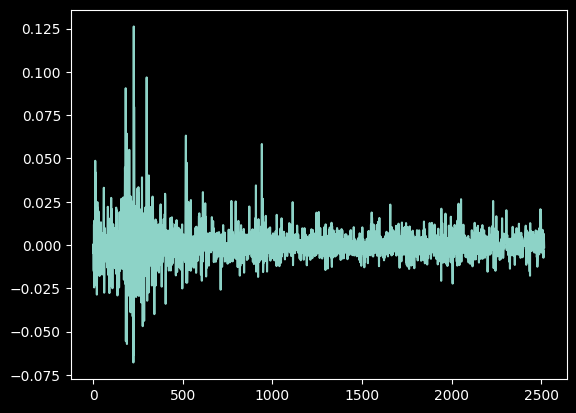

In [60]:
residuals = res.resid

plt.plot(residuals.values)

In [57]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# assuming residuals is a list or array of the model residuals
test_results = acorr_ljungbox(residuals.values.tolist(), lags=[100])


In [59]:
test_results

,lb_stat,lb_pvalue
100,314.685132,4.882433e-24


c:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 2000x1000 with 0 Axes>

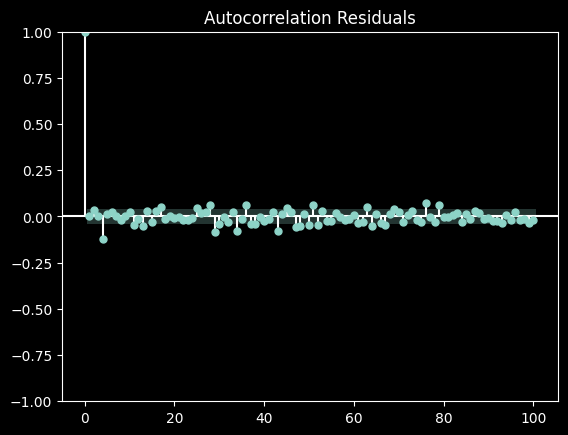

In [61]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(20,10))
plot_pacf(residuals.values,title="Autocorrelation Residuals",lags=100)
plt.show()

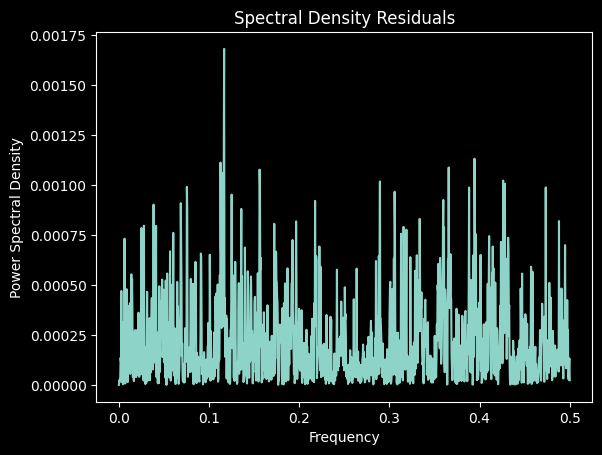

In [62]:
freqs, psd = periodogram(residuals)
plt.plot(freqs,psd)
# plt.ylim(0.00,0.01)
plt.xlabel("Frequency")
plt.ylabel("Power Spectral Density")
plt.title("Spectral Density Residuals")
plt.show()

In [70]:
len(Y_test),len(preds)
len(X_test)

251

In [85]:
X_test.values

array([[ 0.0085 ,  0.00294, -0.00216, -0.00496,  0.00314],
       [ 0.0059 , -0.00476, -0.00196, -0.00706, -0.00066],
       [ 0.0042 , -0.00226,  0.00244, -0.00016,  0.00304],
       ...,
       [ 0.0078 , -0.00721, -0.00141, -0.00151,  0.00099],
       [-0.0003 ,  0.00739,  0.00249, -0.00381, -0.00071],
       [ 0.009  , -0.00151, -0.00461, -0.00101, -0.00131]])

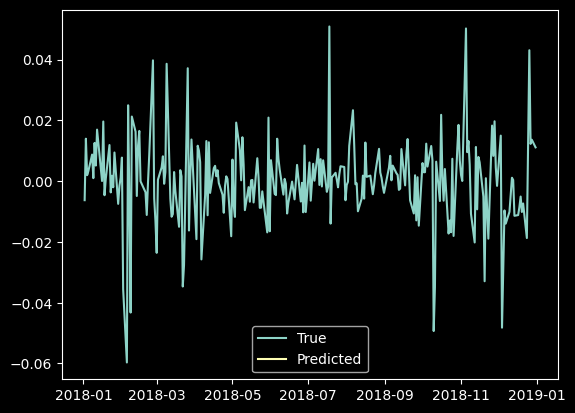

In [90]:
preds = res.predict(exog=X_test)

plt.plot(Y_test,label="True")
plt.plot(preds["2018":],label="Predicted")
plt.legend()
plt.show()

In [92]:
res.predict(exog = X_test)

DATE
2008-01-02   -0.011755
2008-01-03    0.001530
2008-01-04   -0.015403
2008-01-07    0.001789
2008-01-08   -0.012128
                ...   
2017-12-22    0.001257
2017-12-26    0.002089
2017-12-27   -0.000567
2017-12-28    0.001236
2017-12-29   -0.004173
Name: predicted_mean, Length: 2518, dtype: float64

In [95]:
X_train.columns,X_test.columns

(Index(['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'], dtype='object'),
 Index(['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'], dtype='object'))